0.36


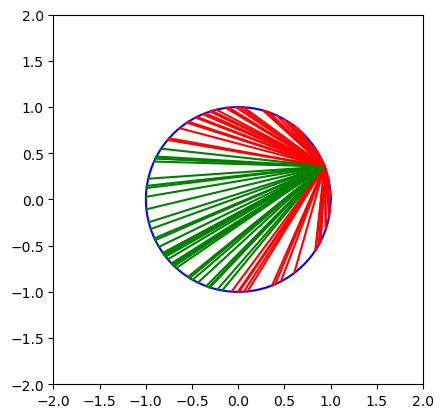

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
from random import random
import math

# 1st case - random endpoints
R = 1
# polar angle
alpha = random() * (2 * np.pi)
side = R * math.sqrt(3)
good = 0
#draw a circle
angles = np.linspace(0 * np.pi, 2 * np.pi, 100 )
xs = R * np.cos(angles)
ys = R * np.sin(angles)
plt.plot(xs, ys, color = 'blue')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
#from triangle ABC
A_x = R * np.cos(alpha)
A_y = R * np.sin(alpha)
for i in range(100):
    alpha = random() * (2 * np.pi)
    #one of the endpoints (the other is point A)
    E_x = R * np.cos(alpha)
    E_y = R * np.sin(alpha)
    distance = math.sqrt((A_x - E_x)**2 + (A_y - E_y)**2)
    if distance > side:
        good += 1
        plt.plot([A_x, E_x], [A_y, E_y], color='green')
    else:
        plt.plot([A_x, E_x], [A_y, E_y], color='red')
print(good/100)
plt.show()

0.45


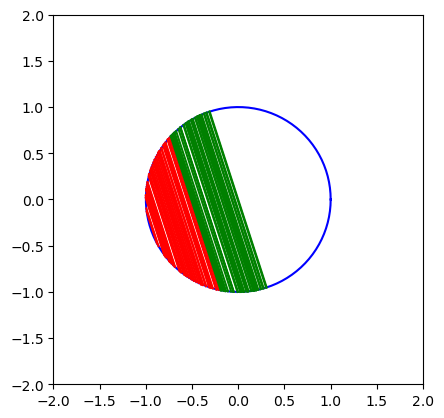

In [2]:
# 2nd case - random radial point
R = 1
alpha = random() * (2 * np.pi)
good = 0
# midpoint of the radius = punctul unde se intersecteaza raza aleasa cu latura triunghiului
# bassicaly the midpoint is on the circle inscribed inside the triangle
# the midpoint of the radius
M_x = R / 2 * np.cos(alpha)
M_y = R / 2 * np.sin(alpha)
distance_from_M_to_O = R / 2
#draw a circle
angles = np.linspace(0 * np.pi, 2 * np.pi, 100 )
xs = R * np.cos(angles)
ys = R * np.sin(angles)
plt.plot(xs, ys, color = 'blue')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
for i in range(100):
    # we need to find a random point on the radius
    var = random() * R
    RP_x = var * R * np.cos(alpha)
    RP_y = var * R * np.sin(alpha)
    distance_from_RP_to_O = math.sqrt((RP_x)**2 + (RP_y)**2)
    # perpendicular angle to alpha
    beta = abs(alpha - np.pi/2)
    # cord length
    length = math.sqrt(pow(R, 2) - pow(math.sqrt((RP_x)**2 + (RP_y)**2),2))
    # cord endpoints
    E1_x = RP_x + length * np.cos(beta)
    E1_y = RP_y + length * np.sin(beta)
    E2_x = RP_x - length * np.cos(beta)
    E2_y = RP_y - length * np.sin(beta)
    if distance_from_RP_to_O < distance_from_M_to_O:
        good += 1
        plt.plot([E1_x, E2_x], [E1_y, E2_y], color='green')
    else:
        plt.plot([E1_x, E2_x], [E1_y, E2_y], color='red')
print(good/100)
plt.show()

0.28


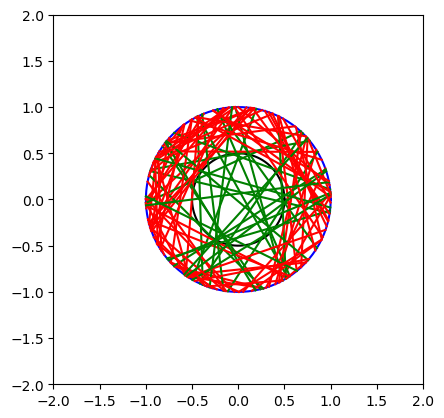

In [3]:
# 3nd case - random midpoint
R = 1
#radius of the smaller circle
r = R/2
alpha = random() * (2 * np.pi)
good = 0
#draw a circle
angles = np.linspace(0 * np.pi, 2 * np.pi, 100 )
xs = R * np.cos(angles)
ys = R * np.sin(angles)
plt.plot(xs, ys, color = 'blue')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
#draw the smaller circle
angles2 = np.linspace(0 * np.pi, 2 * np.pi, 100)
xs2 = r * np.cos(angles)
ys2 = r * np.sin(angles)
plt.plot(xs2, ys2, color = 'black')

for i in range(100):
    alpha = random() * (2 * np.pi)
    rand_r = math.sqrt(random())
    #midpoint (inside the circle) (polar coord)
    M_x = rand_r * R * np.cos(alpha)
    M_y = rand_r * R * np.sin(alpha)
    distance = math.sqrt((M_x)**2 + (M_y)**2)
    
    # ecuatia cercului x^2 + y^2 = 1
    # panta lui AB
    m = -M_x/M_y
    # ecuatia liniei AB
    # y = AB_slope * x + c
    # M apartine liniei AB
    c = M_y + M_x**2/M_y
    # inlocuim ecuatia liniei AB in ecuatia cercului
    # (1 + AB_slope^2) * x^2 + 2 * AB_slope * c * x + c^2= 1
    # determinant = b^2 - 4 * a * c
    A = m**2 + 1
    B = 2 * m * c
    C = c**2 - R**2
    d = np.sqrt(B**2 - 4 * A * C)
    E1_x = (-B + d)/2/A
    E1_y = m * E1_x + c
    E2_x = (-B - d)/2/A
    E2_y = m * E2_x + c
    if distance <= r:
        good += 1
        #plt.plot(M_x, M_y, color='green', marker='.')
        plt.plot([E1_x, E2_x], [E1_y, E2_y], color='green')
    else:
        #plt.plot(M_x, M_y, color='red', marker='.')
        plt.plot([E1_x, E2_x], [E1_y, E2_y], color='red')
print(good/100)
plt.show()